<a href="https://colab.research.google.com/github/camillabocciolone/Leonardo-project/blob/main/ll2_2025_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation Models:

- L’EEG registra l’attività elettrica cerebrale e ha grande valore clinico e scientifico.
- L’analisi tradizionale si basa sull’ispezione visiva di esperti o su feature ingegnerizzate.
- I modelli deep learning supervisionati (EEG-DL) hanno migliorato le performance su specifici compiti, ma soffrono di overfitting, mancanza di interpretabilità e scarsa trasferibilità tra dataset e soggetti.
- I Foundation Models (FMs), pre-addestrati su grandi quantità di dati non etichettati tramite Self-Supervised Learning (SSL), offrono una soluzione potenziale, imparando rappresentazioni generalizzabili riutilizzabili su vari task con pochi dati etichettati.


- **EEG Foundation Models: A Critical Review of Current Progress and Future Directions**. Comparison:

    BrainBERT

    Neuro-GPT

    Brant

    BIOT

    *EEGFormer*

    LaBraM
    
    *Mentality*
    
    NeuroLM
    
    FoME
    
    *BrainWave*
   
   https://arxiv.org/pdf/2507.11783

   contenuto:
   
   Gli autori scompongono un EEG-FM in alcuni pilastri principali:
   
   1) Rappresentazione dei dati di input

        L’EEG può essere rappresentato come segnale nel tempo, spettro di potenza o rappresentazione tempo-frequenza.
        La scelta dell’input influenza la qualità delle rappresentazioni apprese.
  2) Architettura del modello

      Quasi tutti gli EEG-FMs si basano su transformer, a volte combinati con strati convoluzionali per catturare pattern locali.
      Alcuni includono tokenizzatori o codebook (tipo VQ-VAE) per quantizzare le rappresentazioni.
  3) Self-supervised learning (SSL)

      I task SSL comuni sono: ricostruzione di sequenze mascherate, modellazione autoregressiva o contrastive learning.
      Lo scopo è imparare relazioni intrinseche nei dati senza etichette.
  4) Transfer learning e adattamento
  
      Dopo il pretraining, il backbone viene riutilizzato e adattato (fine-tuning o linear probing) per task specifici.
  5) Scala di dati e modello

      Maggiori quantità di dati e parametri migliorano la qualità delle rappresentazioni, ma l’effetto della scalabilità nell’EEG non è ancora ben dimostrato.

Pipeline di un EEG Foundation Model

1️⃣ Raccolta e preparazione dei dati
Input: segnali EEG multi-canale (scalp o intracraniali).
Preprocessing minimo:
- filtraggio passa-banda (0.5–60 Hz),
- notch a 50/60 Hz,
- risampling (200–250 Hz),
- segmentazione in patch da 1–10 s.

Nessuna etichetta: i dati sono grezzi e non annotati.

Rappresentazione:
- nel tempo (raw time series) → più comune;
- oppure spettro / tempo-frequenza (STFT, wavelet).

2️⃣ Definizione della rappresentazione di input

- Ogni segmento EEG X∈R può essere diviso in token (piccoli blocchi temporali);
- arricchito con positional embeddings (tempo + canale) per dare al modello nozioni di ordine e topografia.

3️⃣ Architettura del modello

Backbone (feature extractor): quasi sempre un Transformer, a volte preceduto da strati convoluzionali per pattern locali.

Tokenizzatore opzionale: (LaBraM, NeuroLM, EEGFormer) → usa un codebook discreto tipo VQ-VAE per quantizzare le rappresentazioni.

Decoder: ricostruisce o predice parti mascherate del segnale.

Struttura tipica:
Input EEG  →  Tokenization  →  Positional Embeddings
           →  Encoder (Transformer/CNN)
           →  Decoder (per SSL task)


4️⃣ Pretraining (Self-Supervised Learning)

Scopo: imparare rappresentazioni EEG generali senza etichette.

Task SSL principali:
Tipo di SSL	Esempio	Obiettivo
- Masked reconstruction	BrainBERT, LaBraM	Ricostruire patch nascoste del segnale
- Contrastive learning	BIOT	Avvicinare rappresentazioni di viste simili del segnale
- Autoregressivo	NeuroLM	Predire il prossimo token a partire dai precedenti

👉 Il modello impara così una rappresentazione latente compatta e robusta del segnale.

5️⃣ Salvataggio del backbone pre-addestrato

Dopo il pretraining, il backbone (encoder) diventa un feature extractor generalista:

rappresenta EEG di soggetti, sessioni o dispositivi diversi in uno spazio latente comune.

6️⃣ Adattamento a nuovi task (Transfer learning)

Con piccoli dataset etichettati:

Tipo di adattamento	Descrizione
- Linear probing	Backbone congelato, si allena solo una testa lineare di classificazione.
- Fine-tuning	Si aggiornano anche i pesi del backbone (tutto o in parte).
- Few-shot / Zero-shot	Si usa il backbone quasi “as-is” per nuovi task, sfruttando la similarità nello spazio latente.

8️⃣ Miglioramenti futuri suggeriti
- Usare dataset più vari (scalp + iEEG + sleep + BCI).
- Estendere la lunghezza del contesto temporale (> 90 s).
- Aggiungere attenzione spaziale tra canali.
- Fare valutazioni standardizzate e zero-shot.
- Integrare federated learning e multi-modalità (EEG + - testo, ECG, video).
- Studiare interpretabilità e affidabilità clinica.




- **A Simple Review of EEG Foundation Models: Datasets, Advancements and Future Perspectives**. Comparison:
    Brant,
    
    Brant-2
    
    LaBraM
    
    NeuroGPT
    
    BIOT
    
    EEGPT1
    
    BrainBERT
    
    FoME
    
    EEGPT2
    
    MBrain
    
    NeuroLM
    
    CBraMod
    
    EEGFormer
    
    ALFEE

    https://arxiv.org/pdf/2504.20069

- **EEGMamba: An EEG foundation model with Mamba**
Propone un modello foundation per EEG, denominato EEGMamba, apprendendo rappresentazioni generiche dell’EEG che possono essere usate per vari compiti downstream.
https://www.sciencedirect.com/science/article/abs/pii/S0893608025006963?utm_source=chatgpt.com

- **Graph-Enhanced EEG Foundation Model (GEFM)**
Combina modelli transformer (o autoencoder mascherati) con componenti di Graph Neural Network (GNN) per catturare sia la dinamica temporale che le relazioni tra canali EEG. Questo approccio ibrido mira a modellare i segnali EEG come grafi con nodi = canali. https://arxiv.org/html/2411.19507v1?utm_source=chatgpt.com

# Graph Neural Networks / Machine Learning
**se  >= 16 canali può avere senso usare graph neural network mentre con meno meglio graph machine learning**

- **A review of Graph Neural Networks for Electroencephalography data analysis** Although EEG sensor do not provide actual brain localizations of the activity sources, they allow to study brain functional connectivity. In this paper we review current application of a specific family of computational methods, the Graph Neural Networks (GNN) to the analysis of EEG data. GNNs appear to be well suited to EEG data modeling as they deal with signals whose domain is defined by a graph instead of a regular lattice in Euclidean space.
https://www.sciencedirect.com/science/article/pii/S092523122301024X

- **Revealing brain connectivity: graph embeddings for EEG representation learning and comparative analysis of structural and functional connectivity**: classificazione EEG per compiti di motor imagery. In particolare lo studio propone due modelli GCN per la classificazione EEG di motor imagery, uno basato su connessioni strutturali (Adj-CNNM) e l’altro su connessioni funzionali (PLV-CNNM).
Il secondo risulta più accurato e, oltre a migliorare la classificazione, aiuta a comprendere meglio la connettività cerebrale durante i compiti motori.
https://pmc.ncbi.nlm.nih.gov/articles/PMC10804888/?utm_source=chatgpt.com

- **Graph-Based Learning for EEG Workload Classification** Vogliono stimare il Mental Workload (MWL) da EEG che generalizzi a soggetti mai visti, usando reti su grafi (GNN) invece di feature fatte a mano.

Dati e pipeline (uguale per entrambi i dataset)
  * Mantis (privato): 100 soggetti, 32 canali, 500 Hz (→ 250 Hz), task N-back (0–5).
  * STEW (pubblico): 48 soggetti, 14 canali, 128 Hz; baseline vs SIMKAP.
  * Preproc: resampling 250 Hz, notch 50 Hz, rimozione canali “cattivi”, common average reference, band-pass 1–30 Hz, epoche da 1 s (overlap 0.3 Mantis / 0.5 STEW), stack K=30 (Mantis), K=15 (STEW).
  * Valutazione: LOSOCV = ogni giro lasci fuori un soggetto per il test. È lo standard corretto per verificare generalizzazione cross-subject (niente calibrazione del nuovo soggetto).

  Modelli confrontati
  * GGN (da Li et al., 2022): genera il grafo di connettività, attentive graph conv + CNN + classifier FC.
  * GNN (Tang et al., 2021): GNN self-supervised che usa geometria degli elettrodi o connettività dinamica.
  * Baseline: CNN (tipo SeizureNet) e Transformer (implementazioni da letteratura MWL).

  https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://2025.ccneuro.org/abstract_pdf/Bocini_2025_Graph-Based_Learning_EEG_Workload_Classification_Eliminating.pdf&ved=2ahUKEwiPxoXFnY2QAxXLUaQEHQbQAI4QFnoECBgQAQ&usg=AOvVaw3vsIgV2WBC7BpDVNskjehe

# Functional Data Analysis
- **Classification of EEG signals: An interpretable approach using functional data analysis**:
Electroencephalography (EEG) is a noninvasive method to record electrical activity of the brain. The EEG data is continuous flow of voltages, in this paper, we consider them as functional data, and propose a three-stage algorithm based on functional data analysis, with the advantage of interpretability. Specifically, the time and frequency information are extracted by wavelet transform in the first stage. Then, functional testing is utilized to select EEG channels and frequencies that show significant differences for different human behaviors. In the third stage, we propose to use penalized multiple functional logistic regression to interpretably classify human behaviors. With simulation and a scalp EEG data as validation set, we show that the proposed three-stage algorithm provides an interpretable classification of the scalp EEG signals
https://www.sciencedirect.com/science/article/abs/pii/S0165027022001364

- Hasenstab et al., 2017 (Biometrics) — M(ulti-) D-FPCA su ERP multicanale (tempo×trial×elettrodo) per estrarre componenti funzionali multivariati su cui poi si possono addestrare classificatori; lavoro “cardine” per la fase FPCA/MFPCA su EEG https://pubmed.ncbi.nlm.nih.gov/28072468/

- Paper: Nie, Wang, Liu, Cao, “Supervised Functional Principal Component Analysis”. Applicazione reale su EEG (alcolisti vs controlli).

  Nel paper si chiarisce esplicitamente che l’approccio convenzionale consiste nel rappresentare i segnali come funzioni, calcolare le componenti principali funzionali (FPC) e usare i relativi punteggi (score) come variabili per predire l’esito. Questo è scritto già nell’introduzione: prima si fa FPCA sul predittore funzionale e poi si impiegano i primi score FPC per stimare il modello di risposta. Questo corrisponde esattamente alla pipeline che vuoi implementare.

  Il modello usato è un modello lineare funzionale generalizzato, con link logistico quando la risposta è binaria; gli autori richiamano anche l’estensione ai casi multinomiali. Quindi la stessa struttura FPCA→score si presta sia a classificazione binaria sia, per estensione, a problemi con più classi.

  Nella sezione applicativa su EEG gli autori descrivono in modo operativo la pipeline: a) costruiscono curve EEG per sensore e soggetto; b) stimano le prime p FPC per ciascun sensore con la loro variante supervisionata; c) passano alla classificazione stimando una logistica funzionale multivariata, che viene riscritta direttamente in funzione degli score FPC per sensore (somma degli score per sensore moltiplicati da coefficienti da stimare); d) applicano una penalizzazione L1 sui coefficienti e selezionano i parametri tramite cross-validation solo sul training, quindi valutano l’errore di classificazione sul test. È tutto specificato, inclusa l’equazione della logistica in termini di score e il protocollo di selezione dei parametri.

  Infine riportano una tabella con gli errori di classificazione medi e deviazioni standard al variare del numero di FPC: la versione supervisionata della FPCA riduce l’errore rispetto alla FPCA “standard”, confermando la bontà della pipeline “base → FPC → score → classificatore”. Questo fornisce anche numeri di riferimento per la tua implementazione.

  In sintesi, lo stesso articolo ti dà: (i) giustificazione della pipeline FPCA→score→classificatore, (ii) formulazione del modello logistico funzionale (anche estendibile a più classi), (iii) applicazione concreta su EEG con passaggi pratici (stima FPC per sensore, logistica sugli score, CV sul training, valutazione sul test) e (iv) risultati comparativi che mostrano il vantaggio dell’approccio.

  https://link.springer.com/article/10.1007/s11222-017-9758-2
  


proviamo il foundation model CBraMod

In [4]:
# ============================================================
# CBraMod 🚀 Fine-tuning su EEG (Colab-ready)
# ============================================================
# ✅ Funziona con dati fittizi (smoke test)
# ✅ Poi switcha facilmente ai tuoi dati reali
# ------------------------------------------------------------

# --- 0) Colab/Env Setup ---
import os, sys, subprocess, math, random, time
from pathlib import Path

IN_COLAB = "google.colab" in sys.modules

# (Opzionale) Monta Google Drive se vuoi salvare i risultati lì
if IN_COLAB:
    from google.colab import drive
    MOUNT_DRIVE = False  # cambia a True se vuoi montare Drive
    if MOUNT_DRIVE:
        drive.mount('/content/drive')

WORKDIR = "/content"
os.chdir(WORKDIR)

# --- 1) Dipendenze & Repo ---
# Colab ha già torch; installiamo solo ciò che serve
!pip -q install einops huggingface_hub scikit-learn tqdm

# Clona la repo CBraMod se non presente
REPO_DIR = Path("CBraMod")
if not REPO_DIR.exists():
    !git clone -q https://github.com/wjq-learning/CBraMod.git
os.chdir("CBraMod")

# Prova a installare requirements del repo (se fallisce, continuiamo lo stesso)
req_path = Path("requirements.txt")
if req_path.exists():
    try:
        print("Installing repo requirements...")
        subprocess.run([sys.executable, "-m", "pip", "install", "-r", "requirements.txt", "-q"], check=False)
    except Exception as e:
        print("Warning: requirements install failed, continue anyway:", e)



Installing repo requirements...


In [5]:
# --- 2) Scarica pesi pre-addestrati da Hugging Face ---
from huggingface_hub import snapshot_download
weights_dir = snapshot_download("weighting666/CBraMod")
# cerchiamo un .pth plausibile dentro allo snapshot
from glob import glob
pths = glob(os.path.join(weights_dir, "**", "*.pth"), recursive=True)
os.makedirs("pretrained_weights", exist_ok=True)
target_pth = "pretrained_weights/pretrained_weights.pth"
if len(pths) > 0:
    # copia il primo che troviamo come default
    import shutil
    shutil.copy(pths[0], target_pth)
    print(f"Checkpoint copiato in: {target_pth}")
else:
    print("⚠️ Nessun .pth trovato nello snapshot. Se hai un tuo checkpoint, mettilo in pretrained_weights/pretrained_weights.pth")

# --- 3) Import librerie PyTorch e modello ---
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from einops.layers.torch import Rearrange
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from tqdm.auto import tqdm

# Assicurati che la repo sia nel PYTHONPATH per importare il modello
if str(Path.cwd()) not in sys.path:
    sys.path.append(str(Path.cwd()))
from models.cbramod import CBraMod

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)




/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

pretrained_weights.pth:   0%|          | 0.00/19.8M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md:   0%|          | 0.00/75.0 [00:00<?, ?B/s]

Checkpoint copiato in: pretrained_weights/pretrained_weights.pth
Device: cpu


In [9]:
# --- 4) Config ---
C = 8             # canali
S = 4             # segmenti temporali per finestra
P = 200           # punti per segmento -> S*P = lunghezza finestra
N_CLASSES = 4     # numero classi
BATCH_SIZE = 64
EPOCHS = 20
LR = 1e-3
WEIGHT_DECAY = 1e-4
PATIENCE = 5      # early stopping
USE_DUMMY_DATA = True  # True => dati fittizi per smoke test
OUTPUT_DIR = Path("runs_cbramod")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
# --- 7) Modello + Classifier ---
model = CBraMod().to(device)

# carica pesi pretrain se presenti
if Path(target_pth).exists():
    state = torch.load(target_pth, map_location=device)
    # carichiamo in modo "tollerante"
    missing, unexpected = model.load_state_dict(state, strict=False)
    print("Loaded pretrained. Missing keys:", len(missing), "Unexpected keys:", len(unexpected))
else:
    print("⚠️ Nessun checkpoint trovato, si partirà from-scratch.")

# proiezione output a identità per prendere features “grezze”
model.proj_out = nn.Identity()
model.eval()


Loaded pretrained. Missing keys: 0 Unexpected keys: 0


CBraMod(
  (patch_embedding): PatchEmbedding(
    (positional_encoding): Sequential(
      (0): Conv2d(200, 200, kernel_size=(19, 7), stride=(1, 1), padding=(9, 3), groups=200)
    )
    (proj_in): Sequential(
      (0): Conv2d(1, 25, kernel_size=(1, 49), stride=(1, 25), padding=(0, 24))
      (1): GroupNorm(5, 25, eps=1e-05, affine=True)
      (2): GELU(approximate='none')
      (3): Conv2d(25, 25, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
      (4): GroupNorm(5, 25, eps=1e-05, affine=True)
      (5): GELU(approximate='none')
      (6): Conv2d(25, 25, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
      (7): GroupNorm(5, 25, eps=1e-05, affine=True)
      (8): GELU(approximate='none')
    )
    (spectral_proj): Sequential(
      (0): Linear(in_features=101, out_features=200, bias=True)
      (1): Dropout(p=0.1, inplace=False)
    )
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn_s): MultiheadAtte

In [ ]:
# --- 4) Config ---
C = 8             # canali
S = 4             # segmenti temporali per finestra
P = 200           # punti per segmento -> S*P = lunghezza finestra
N_CLASSES = 4     # numero classi
BATCH_SIZE = 64
EPOCHS = 20
LR = 1e-3
WEIGHT_DECAY = 1e-4
PATIENCE = 5      # early stopping
USE_DUMMY_DATA = True  # True => dati fittizi per smoke test
OUTPUT_DIR = Path("runs_cbramod")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# --- 5) Dataset ---
class MyEEGDataset(Dataset):
    """
    Deve restituire (x, y) con:
      x.shape = (C, S, P)
      y       = int in [0, N_CLASSES-1]
    """
    def __init__(self, split="train", transform=None):
        self.split = split
        self.transform = transform

        if USE_DUMMY_DATA:
            # Dati fittizi per prova: 200 esempi train, 50 val, 50 test
            if split == "train":
                self.N = 200
            elif split == "val":
                self.N = 50
            else:
                self.N = 50
            # generiamo tensor (N, C, S, P) e label random
            rng = np.random.default_rng(42 + (0 if split=="train" else 1 if split=="val" else 2))
            self.X = rng.normal(size=(self.N, C, S, P)).astype(np.float32)
            self.y = rng.integers(low=0, high=N_CLASSES, size=(self.N,), endpoint=False).astype(np.int64)
        else:
            # TODO: Carica i TUOI dati reali qui.
            # Esempio:
            # - Leggi file .npy o .mat o .edf preprocessati
            # - Prepara X con shape (N, C, S, P) e y (N,)
            # - Eventuale normalizzazione z-score per canale
            # - Eventuale bilanciamento classi
            # Per esempio:
            # self.X = np.load(f"/content/mydata/{split}_X.npy")  # (N, C, S, P)
            # self.y = np.load(f"/content/mydata/{split}_y.npy")  # (N,)
            # assert self.X.shape[1:] == (C, S, P)
            raise NotImplementedError("Implementa il caricamento dati reali (metti USE_DUMMY_DATA=False).")

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        x = self.X[idx]  # (C, S, P)
        y = int(self.y[idx])

        if self.transform is not None:
            x = self.transform(x)

        # converte in torch
        x = torch.tensor(x, dtype=torch.float32)
        return x, y

# --- 6) Dataloaders ---
train_ds = MyEEGDataset("train")
val_ds   = MyEEGDataset("val")
test_ds  = MyEEGDataset("test")

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)







Loaded pretrained. Missing keys: 0 Unexpected keys: 0


CBraMod(
  (patch_embedding): PatchEmbedding(
    (positional_encoding): Sequential(
      (0): Conv2d(200, 200, kernel_size=(19, 7), stride=(1, 1), padding=(9, 3), groups=200)
    )
    (proj_in): Sequential(
      (0): Conv2d(1, 25, kernel_size=(1, 49), stride=(1, 25), padding=(0, 24))
      (1): GroupNorm(5, 25, eps=1e-05, affine=True)
      (2): GELU(approximate='none')
      (3): Conv2d(25, 25, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
      (4): GroupNorm(5, 25, eps=1e-05, affine=True)
      (5): GELU(approximate='none')
      (6): Conv2d(25, 25, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
      (7): GroupNorm(5, 25, eps=1e-05, affine=True)
      (8): GELU(approximate='none')
    )
    (spectral_proj): Sequential(
      (0): Linear(in_features=101, out_features=200, bias=True)
      (1): Dropout(p=0.1, inplace=False)
    )
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn_s): MultiheadAtte

In [11]:
# ========= Feature extraction per sklearn =========
import torch
import numpy as np
from tqdm.auto import tqdm

model.eval()                        # backbone congelato
POOLING = "mean_time"              # "mean_time" | "flatten"
# "mean_time": avg su (S,P) -> feature dim = C
# "flatten":   vectorizza (C,S,P) -> feature dim = C*S*P (molto più grande)

def extract_features(backbone, loader, pooling="mean_time", device="cuda"):
    Xs, ys = [], []
    with torch.no_grad():
        for x, y in tqdm(loader, desc="Extract"):
            x = x.to(device)
            feats = backbone(x)     # shape (B, C, S, P) perché abbiamo messo model.proj_out = nn.Identity()
            if pooling == "mean_time":
                feats = feats.mean(dim=(2,3))         # (B, C)
            elif pooling == "flatten":
                feats = feats.reshape(feats.size(0), -1)  # (B, C*S*P)
            else:
                raise ValueError("pooling sconosciuto")
            Xs.append(feats.cpu().numpy())
            ys.append(y.numpy())
    X = np.concatenate(Xs, axis=0)
    y = np.concatenate(ys, axis=0)
    return X, y



In [ ]:
X_tr, y_tr = extract_features(model, train_loader, pooling=POOLING, device=device)
X_va, y_va = extract_features(model, val_loader,   pooling=POOLING, device=device)
X_te, y_te = extract_features(model, test_loader,  pooling=POOLING, device=device)
print("Shapes:", X_tr.shape, X_va.shape, X_te.shape)  # es. (200, 8) (50, 8) (50, 8) con mean_time


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lda_pipe = Pipeline([
    ("scaler", StandardScaler()),                                  # sempre utile
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")),
])

lda_pipe.fit(X_tr, y_tr)
va_pred = lda_pipe.predict(X_va)
te_pred = lda_pipe.predict(X_te)
print("[LDA] Val ACC:", accuracy_score(y_va, va_pred))
print("[LDA] Test ACC:", accuracy_score(y_te, te_pred))
print("Confusion Matrix (LDA):\n", confusion_matrix(y_te, te_pred))


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 291, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 25

[LDA] Val ACC: 0.18
[LDA] Test ACC: 0.32
Confusion Matrix (LDA):
 [[ 1  3  9  0]
 [ 2  3  4  1]
 [ 2  1 12  0]
 [ 1  4  7  0]]


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("qda", QuadraticDiscriminantAnalysis(reg_param=0.1)),  # prova 0.0, 0.1, 0.2...
])

qda_pipe.fit(X_tr, y_tr)
va_pred = qda_pipe.predict(X_va)
te_pred = qda_pipe.predict(X_te)
print("[QDA] Val ACC:", accuracy_score(y_va, va_pred))
print("[QDA] Test ACC:", accuracy_score(y_te, te_pred))
print("Confusion Matrix (QDA):\n", confusion_matrix(y_te, te_pred))


[QDA] Val ACC: 0.3
[QDA] Test ACC: 0.38
Confusion Matrix (QDA):
 [[1 7 3 2]
 [1 5 3 1]
 [3 3 9 0]
 [1 3 4 4]]


qui sotto fine tuning totale ma Se volessimo parlare di fine-tuning parziale, significherebbe sbloccare solo alcuni layer del backbone (per esempio gli ultimi due blocchi o solo la testa).
Nel mio script puoi farlo modificando questa parte:
for name, p in model.named_parameters():
    p.requires_grad = ("block5" in name)  # esempio: sblocca solo block5
ma di default io l’ho messo “tutto sbloccato”.

In [ ]:
# --- (1) Testa PyTorch minimale ---
import torch
import torch.nn as nn
from einops.layers.torch import Rearrange

# Se prima avevi messo: model.proj_out = nn.Identity()
# allora l'output di model(x) è (B, C, S, P). Usiamo Flatten + Linear:
classifier = nn.Sequential(
    Rearrange('b c s p -> b (c s p)'),
    nn.Linear(C*S*P, N_CLASSES),
).to(device)

# --- (2) Fase A: linear probing "warmup" SOLO per la testa ---
for p in model.parameters():
    p.requires_grad = False
model.eval()

optimizer = torch.optim.AdamW(classifier.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):  # poche epoche di warmup
    classifier.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.no_grad():        # backbone congelato
            feats = model(x)
        logits = classifier(feats)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

# --- (3) Fase B: fine-tuning PARZIALE: sblocca solo gli ultimi layer ---
for name, p in model.named_parameters():
    p.requires_grad = ("block5" in name or "block4" in name)  # <-- adatta al naming reale dei layer

# Ora ottimizzi testa + layer sbloccati con LR più bassa
ft_params = [p for p in model.parameters() if p.requires_grad] + list(classifier.parameters())
optimizer = torch.optim.AdamW(ft_params, lr=3e-4, weight_decay=1e-4)

EPOCHS = 20
for epoch in range(EPOCHS):
    model.train(); classifier.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)
        feats = model(x)
        logits = classifier(feats)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

# --- (4) Valutazione ---
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate(backbone, clf, loader):
    backbone.eval(); clf.eval()
    preds, trues = [], []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            logits = clf(backbone(x))
            preds.append(logits.argmax(1).cpu().numpy())
            trues.append(y.numpy())
    preds = np.concatenate(preds); trues = np.concatenate(trues)
    return accuracy_score(trues, preds), confusion_matrix(trues, preds, labels=list(range(N_CLASSES)))

val_acc, _ = evaluate(model, classifier, val_loader)
test_acc, cm = evaluate(model, classifier, test_loader)
print(f"Val ACC: {val_acc:.3f} | Test ACC: {test_acc:.3f}")
print("Confusion matrix:\n", cm)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Val ACC: 0.280 | Test ACC: 0.300
Confusion matrix:
 [[ 3  0  8  2]
 [ 3  0  7  0]
 [ 3  0 10  2]
 [ 2  0  8  2]]


In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from google.colab import drive
import os

# Monta Google Drive
drive.mount('/content/drive', force_remount=True)

# Imposta la directory dove si trovano i dati (modifica il percorso secondo la tua struttura)
data_dir = "/content/drive/My Drive/LL2/LL2/raw_data"

# parametri
C = 8       # numero di canali nel tuo file
S = 4        # segmenti temporali
P = 200      # punti per segmento -> finestra = S*P = 800 punti
fs = 250     # esempio: 400 Hz
window_size = S * P    # punti per finestra
stride = window_size   # o puoi usare overlap, tipo window_size//2


Mounted at /content/drive


In [ ]:
def segment_eeg(df, S=4, P=200):
    """
    Converte un DataFrame EEG (C canali × T punti) in finestre di shape (N, C, S, P)
    """
    X = []
    T = len(df)
    C = df.shape[1] - 1   # escludi la colonna Time
    sig = df.iloc[:, :C].values.T  # (C, T)
    for start in range(0, T - S*P + 1, S*P):  # nessun overlap
        seg = sig[:, start:start + S*P]       # (C, S*P)
        seg = seg.reshape(C, S, P)
        X.append(seg)
    return np.stack(X)  # (N, C, S, P)


In [ ]:
tasks = ["highlevel", "midlevel", "lowlevel"]
level = ["Stroop","Arithmetic"]
subjects = range(1, 16)  # esempio 15 soggetti

X_all, y_all = [], []
for liv in level:
    for label, task in enumerate(tasks):
        for subj in subjects:
            path = os.path.join(data_dir, f"{liv}_Data", f"{task}-{subj}.txt")
            if not os.path.exists(path):
                print(f"[SKIP] File non trovato: {path}")
                continue
            df = pd.read_csv(path, sep=",", header=None)
            # Assumiamo che le prime 15 colonne siano EEG, l'ultima il tempo
            df = df.iloc[:, :C+1]
            df.columns = [f"ch{i}" for i in range(C)] + ["Time"]
            X_task = segment_eeg(df, S=S, P=P)
            X_all.append(X_task)
            y_all.extend([label]*len(X_task))

X_all = np.concatenate(X_all)
y_all = np.array(y_all)
print("X_all:", X_all.shape, "y_all:", y_all.shape)



X_all: (2352, 8, 4, 200) y_all: (2352,)


In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train, X_temp, y_train, y_temp = train_test_split(X_all, y_all, test_size=0.3, stratify=y_all, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                        torch.tensor(y_train, dtype=torch.long)), batch_size=64, shuffle=True)
val_loader   = DataLoader(TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                                        torch.tensor(y_val, dtype=torch.long)), batch_size=64)
test_loader  = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                        torch.tensor(y_test, dtype=torch.long)), batch_size=64)


In [ ]:

model.proj_out = nn.Identity()
model.eval()
X_tr, y_tr = extract_features(model, train_loader, pooling="mean_time", device=device)
X_va, y_va = extract_features(model, val_loader,   pooling="mean_time", device=device)
X_te, y_te = extract_features(model, test_loader,  pooling="mean_time", device=device)


NameError: name 'extract_features' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lda_pipe = Pipeline([
    ("scaler", StandardScaler()),                                  # sempre utile
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")),
])

lda_pipe.fit(X_tr, y_tr)
va_pred = lda_pipe.predict(X_va)
te_pred = lda_pipe.predict(X_te)
print("[LDA] Val ACC:", accuracy_score(y_va, va_pred))
print("[LDA] Test ACC:", accuracy_score(y_te, te_pred))
print("Confusion Matrix (LDA):\n", confusion_matrix(y_te, te_pred))



[LDA] Val ACC: 0.43626062322946174
[LDA] Test ACC: 0.43626062322946174
Confusion Matrix (LDA):
 [[153   0   1]
 [100   0   1]
 [ 95   2   1]]


## Modello   + Fine-tuning su dati veri non preprcessed



In [ ]:
# ===================== 8) Modello   + Fine-tuning =====================
import torch
import torch.nn as nn
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Backbone CBraMod ---
backbone = CBraMod().to(device)

# Carica pesi pre-addestrati (se presenti)
if Path(target_pth).exists():
    state = torch.load(target_pth, map_location=device)
    missing, unexpected = backbone.load_state_dict(state, strict=False)
    print("Pretrained loaded. Missing:", len(missing), "| Unexpected:", len(unexpected))
else:
    print("⚠️ Nessun checkpoint pretrain trovato. Si partirà da zero:", target_pth)

# Usiamo l'output "grezzo" (stessa shape dell'input): (B, C, S, P)
backbone.proj_out = nn.Identity()

# --- Testa minimale (Flatten -> Linear) ---
class CBMHead(nn.Module):
    def __init__(self, C, S, P, n_classes):
        super().__init__()
        self.fc = nn.Linear(C*S*P, n_classes)
    def forward(self, feats):                  # feats: (B, C, S, P)
        return self.fc(feats.reshape(feats.size(0), -1))

head = CBMHead(C, S, P, N_CLASSES).to(device)

# --- Helper per forward + valutazione ---
criterion = nn.CrossEntropyLoss()

def forward_logits(x):
    x = x.to(device).float()                   # (B, C, S, P)
    feats = backbone(x)                        # (B, C, S, P) perché proj_out = Identity
    logits = head(feats)                       # (B, N_CLASSES)
    return logits

@torch.no_grad()
def evaluate(loader):
    backbone.eval(); head.eval()
    preds, trues = [], []
    for xb, yb in loader:
        logits = forward_logits(xb)
        preds.append(logits.argmax(1).cpu().numpy())
        trues.append(yb.numpy())
    preds = np.concatenate(preds); trues = np.concatenate(trues)
    return accuracy_score(trues, preds), confusion_matrix(trues, preds, labels=list(range(N_CLASSES)))

# --- Hyperparam (puoi modificarli a piacere) ---
EPOCHS_WARMUP = 5
EPOCHS_FT     = 25
LR_WARMUP     = 1e-3
LR_FT         = 3e-4
WEIGHT_DECAY  = 1e-4
PATIENCE      = 6

# --- 8A) Warmup: Linear probing (backbone congelato, allena SOLO la testa) ---
for p in backbone.parameters():
    p.requires_grad = False
backbone.eval()

opt = torch.optim.AdamW(head.parameters(), lr=LR_WARMUP, weight_decay=WEIGHT_DECAY)

best_val = -1.0
epochs_no_improve = 0
OUTPUT_DIR.mkdir(exist_ok=True, parents=True)
best_warmup_path = OUTPUT_DIR / "best_warmup.pt"

print("\n=== Warmup: linear probing (backbone congelato) ===")
for epoch in range(1, EPOCHS_WARMUP+1):
    head.train()
    running, seen = 0.0, 0
    pbar = tqdm(train_loader, desc=f"[Warmup] {epoch}/{EPOCHS_WARMUP}")
    for xb, yb in pbar:
        xb, yb = xb.to(device).float(), yb.to(device).long()
        opt.zero_grad(set_to_none=True)
        logits = forward_logits(xb)            # backbone in eval, ma forward ok
        loss = criterion(logits, yb)
        loss.backward(); opt.step()
        bs = xb.size(0); running += loss.item()*bs; seen += bs
        pbar.set_postfix(loss=running/max(1,seen))
    val_acc, _ = evaluate(val_loader)
    print(f"Val ACC: {val_acc:.4f}")
    if val_acc > best_val:
        best_val = val_acc; epochs_no_improve = 0
        torch.save({"head": head.state_dict()}, best_warmup_path)
        print("✅ Miglior warmup salvato:", best_warmup_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("⏹️ Early stop (warmup).")
            break

# Ricarica la migliore testa del warmup
if best_warmup_path.exists():
    ck = torch.load(best_warmup_path, map_location=device)
    head.load_state_dict(ck["head"])

# --- 8B) Fine-tuning: sblocca il backbone (totale) e continua ad allenare testa+backbone ---
# Se vuoi un fine-tuning PARZIALE, qui potresti sbloccare solo alcuni layer con name-filter.
for p in backbone.parameters():
    p.requires_grad = True

opt = torch.optim.AdamW(list(backbone.parameters()) + list(head.parameters()),
                        lr=LR_FT, weight_decay=WEIGHT_DECAY)

best_val = -1.0
epochs_no_improve = 0
best_ft_path = OUTPUT_DIR / "best_finetune.pt"

print("\n=== Fine-tuning (backbone sbloccato) ===")
for epoch in range(1, EPOCHS_FT+1):
    backbone.train(); head.train()
    running, seen = 0.0, 0
    pbar = tqdm(train_loader, desc=f"[FT] {epoch}/{EPOCHS_FT}")
    for xb, yb in pbar:
        xb, yb = xb.to(device).float(), yb.to(device).long()
        opt.zero_grad(set_to_none=True)
        logits = forward_logits(xb)
        loss = criterion(logits, yb)
        loss.backward(); opt.step()
        bs = xb.size(0); running += loss.item()*bs; seen += bs
        pbar.set_postfix(loss=running/max(1,seen))

    val_acc, _ = evaluate(val_loader)
    print(f"Val ACC: {val_acc:.4f}")
    if val_acc > best_val:
        best_val = val_acc; epochs_no_improve = 0
        torch.save({"backbone": backbone.state_dict(),
                    "head": head.state_dict()}, best_ft_path)
        print("✅ Miglior FT salvato:", best_ft_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("⏹️ Early stop (FT).")
            break

# --- 9) Test finale ---
if best_ft_path.exists():
    ck = torch.load(best_ft_path, map_location=device)
    backbone.load_state_dict(ck["backbone"], strict=False)
    head.load_state_dict(ck["head"])

test_acc, cm = evaluate(test_loader)
print("\n=== RISULTATI FINALI ===")
print(f"Test ACC: {test_acc:.4f}")
print("Confusion Matrix:\n", cm)

# Report dettagliato
@torch.no_grad()
def collect_preds(loader):
    backbone.eval(); head.eval()
    yp, yt = [], []
    for xb, yb in loader:
        logits = forward_logits(xb)
        yp.append(logits.argmax(1).cpu().numpy())
        yt.append(yb.numpy())
    return np.concatenate(yp), np.concatenate(yt)

yhat, ytrue = collect_preds(test_loader)
print(classification_report(ytrue, yhat, digits=3))
print("Artefatti salvati in:", OUTPUT_DIR.resolve())


Pretrained loaded. Missing: 0 | Unexpected: 0

=== Warmup: linear probing (backbone congelato) ===


[Warmup] 1/5:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.3456
✅ Miglior warmup salvato: runs_cbramod/best_warmup.pt


[Warmup] 2/5:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.4079
✅ Miglior warmup salvato: runs_cbramod/best_warmup.pt


[Warmup] 3/5:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.3031


[Warmup] 4/5:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.3003


[Warmup] 5/5:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.2946

=== Fine-tuning (backbone sbloccato) ===


[FT] 1/25:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.4051
✅ Miglior FT salvato: runs_cbramod/best_finetune.pt


[FT] 2/25:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.2805


[FT] 3/25:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.4363
✅ Miglior FT salvato: runs_cbramod/best_finetune.pt


[FT] 4/25:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.3428


[FT] 5/25:   0%|          | 0/26 [00:00<?, ?it/s]

Val ACC: 0.3513


[FT] 6/25:   0%|          | 0/26 [00:00<?, ?it/s]

KeyboardInterrupt: 

# EEGPT con OpenBCI

In [ ]:
# ================== EEGPT con OpenBCI (8 canali @250 Hz) ==================
!pip -q install einops tqdm scikit-learn scipy

import os, sys, numpy as np, torch
from pathlib import Path
from scipy.signal import resample_poly
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Repo EEGPT ---
%cd /content
if not Path("EEGPT").exists():
    !git clone -q https://github.com/BINE022/EEGPT.git
%cd EEGPT
!pip -q install -r requirements.txt

# --- Import modello EEGPT ---
if str(Path.cwd()) not in sys.path:
    sys.path.append(str(Path.cwd()))
from downstream.Modules.models.EEGPT_mcae_finetune import EEGPTClassifier, CHANNEL_DICT

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# --------- 1) Config canali & sampling ----------
# I TUOI CANALI (OpenBCI 8ch)
my_channels = ["Fp1","Fp2","F7","F3","FZ","F4","F8","C2"]  # case-insensitive
# Verifica che siano nel dizionario del repo (usa maiuscole interne)
channels = []
for ch in my_channels:
    key = ch.upper()
    if key not in CHANNEL_DICT:
        raise ValueError(f"Canale non riconosciuto da EEGPT: {ch}. Controlla la nomenclatura 10-20.")
    channels.append(ch)  # tieni l'originale; il wrapper fa upper() da solo

print("Canali passati a EEGPT:", channels)

FS_SRC = 250    # OpenBCI
FS_TGT = 256    # EEGPT pretrain
WIN_SEC = 4.0   # 4 secondi
TGT_LEN = int(FS_TGT * WIN_SEC)  # 1024 campioni
STRIDE_SEC = 2.0  # overlap 50%
STRIDE = int(FS_TGT * STRIDE_SEC)

# --------- 2) Funzioni: resample 250->256 e segmentazione (C,T)->(N,C,1024) ----------
def resample_to_256(x_8xT, fs_src=250, fs_tgt=256):
    # x shape: (C=8, T)
    # usa resample_poly: fattori piccoli e precisi (up=128, down=125 per 250->256)
    up, down = 128, 125
    return resample_poly(x_8xT, up, down, axis=1)

def make_windows(x_8xT_256, win_len=TGT_LEN, stride=STRIDE):
    # x: (C=8, T256)
    C, T = x_8xT_256.shape
    xs = []
    for start in range(0, T - win_len + 1, stride):
        seg = x_8xT_256[:, start:start+win_len]  # (8,1024)
        xs.append(seg)
    return np.stack(xs, axis=0) if xs else None  # (N, 8, 1024)

# --------- 3) Qui simulo il CARICAMENTO dei tuoi dati grezzi ---------
# Sostituisci questa parte con il tuo loader reale (file .csv/.txt/.edf già sincronizzati).
# Creo un dummy "per sessione": 90 s @250 Hz -> 22500 campioni
rng = np.random.default_rng(42)
def make_dummy_session(seconds=90, n_classes=4):
    T = int(FS_SRC * seconds)
    x = rng.normal(size=(8, T)).astype(np.float32)           # (8, T250)
    y_label = rng.integers(0, n_classes)                     # un'etichetta per la sessione (esempio)
    return x, y_label

# Costruisco dataset fittizio (10 sessioni -> poi segmentate in finestre)
N_SESS = 10
N_CLASSES = 4
X_all, y_all = [], []
for _ in range(N_SESS):
    raw, y = make_dummy_session(seconds=90, n_classes=N_CLASSES)     # (8, T250)
    raw_256 = resample_to_256(raw)                                   # (8, T256)
    Xw = make_windows(raw_256)                                       # (N, 8, 1024)
    if Xw is None:
        continue
    X_all.append(Xw)
    y_all += [y]*len(Xw)

X_all = np.concatenate(X_all, axis=0)  # (N, 8, 1024)
y_all = np.array(y_all, dtype=np.int64)
print("Dataset dummy finestrato:", X_all.shape, y_all.shape)

# --------- 4) Split e DataLoader ----------
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

X_tr, X_te, y_tr, y_te = train_test_split(X_all, y_all, test_size=0.2, stratify=y_all, random_state=0)
X_tr, X_va, y_tr, y_va = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=0)  # 60/20/20

BATCH = 64
train_loader = DataLoader(TensorDataset(torch.tensor(X_tr), torch.tensor(y_tr)), batch_size=BATCH, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(TensorDataset(torch.tensor(X_va), torch.tensor(y_va)), batch_size=BATCH, shuffle=False, pin_memory=True)
test_loader  = DataLoader(TensorDataset(torch.tensor(X_te), torch.tensor(y_te)), batch_size=BATCH, shuffle=False, pin_memory=True)

# --------- 5) Modello EEGPT con i TUOI 8 canali ----------
ckpt_path = Path("checkpoint/eegpt_mcae_58chs_4s_large4E.ckpt")  # metti qui il ckpt se ce l'hai
use_pretrained = ckpt_path.exists()

model = EEGPTClassifier(
    num_classes=N_CLASSES,
    ckpt_path=str(ckpt_path) if use_pretrained else None,
    channels=channels,        # <<<<<< 8 canali: il resto è "mascherato"
    sample_rate=FS_TGT,       # 256 Hz (dopo il resample)
    input_time_length=int(WIN_SEC)
).to(device)
print("EEGPT init OK. Pretrained:", use_pretrained)

# --------- 6) Linear probing (congela il backbone) ----------
for p in model.parameters():
    p.requires_grad = False

# EEGPTClassifier in genere restituisce direttamente i logits
criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.AdamW([p for p in model.parameters() if p.requires_grad], lr=1e-3, weight_decay=1e-4)

def forward_logits(xb):
    xb = xb.to(device).float()  # (B, 8, 1024)
    out = model(xb)
    if isinstance(out, dict) and "logits" in out:
        out = out["logits"]
    return out

@torch.no_grad()
def eval_loader(loader):
    model.eval()
    yp, yt = [], []
    for xb, yb in loader:
        logits = forward_logits(xb)
        yp.append(logits.argmax(1).cpu().numpy())
        yt.append(yb.numpy())
    yp = np.concatenate(yp); yt = np.concatenate(yt)
    return float(accuracy_score(yt, yp)), confusion_matrix(yt, yp, labels=list(range(N_CLASSES)))

EPOCHS, PATIENCE = 5, 3
best_val, noimp = -1.0, 0
print("\n=== Linear Probing (backbone congelato) ===")
for ep in range(1, EPOCHS+1):
    model.train()
    run, seen = 0.0, 0
    pbar = tqdm(train_loader, desc=f"[LP] {ep}/{EPOCHS}")
    for xb, yb in pbar:
        xb, yb = xb.to(device), yb.to(device)
        opt.zero_grad(set_to_none=True)
        logits = forward_logits(xb)
        loss = criterion(logits, yb)
        loss.backward(); opt.step()
        bs = xb.size(0); run += loss.item()*bs; seen += bs
        pbar.set_postfix(loss=run/max(1,seen))
    va_acc, _ = eval_loader(val_loader)
    print(f"Val ACC: {va_acc:.3f}")
    if va_acc > best_val: best_val, noimp = va_acc, 0
    else:
        noimp += 1
        if noimp >= PATIENCE:
            print("Early stop.")
            break

# --------- 7) Test ----------
te_acc, cm = eval_loader(test_loader)
print("\n=== TEST ===")
print("Test ACC:", te_acc)
print("Confusion Matrix:\n", cm)
print(classification_report(
    np.concatenate([yb.numpy() for _, yb in test_loader]),
    np.concatenate([forward_logits(xb).argmax(1).cpu().numpy() for xb, _ in test_loader]),
    digits=3
))



/content
/content/EEGPT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 60.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


/content/EEGPT/downstream/Modules/models/EEGPT_mcae_finetune.py:679: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(True)
/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/content/EEGPT/downstream/Modules/models/EEGPT_mcae_finetune.py:693: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(True)


Device: cpu
Canali passati a EEGPT: ['Fp1', 'Fp2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'C2']
Dataset dummy finestrato: (440, 8, 1024) (440,)


TypeError: 'NoneType' object is not iterable

# domande

- serve un channel adapter ?
-

preprocess_recording(X_ct) applica in quest’ordine:
- Band-pass 0.5–45 Hz
- Notch a 50 Hz (Q=30)
- Resampling da 250 → 256 Hz
- Epoching in finestre da 4 s con stride 2 s → array di shape (N, C, 1024)
- Z-score per epoca (normalizza ogni epoca rispetto a se stessa, canale per canale)
- Se una registrazione è troppo corta per estrarre almeno un’epoca, la salta.

Mounted at /content/drive
Epoche ottenute: (43, 1024)


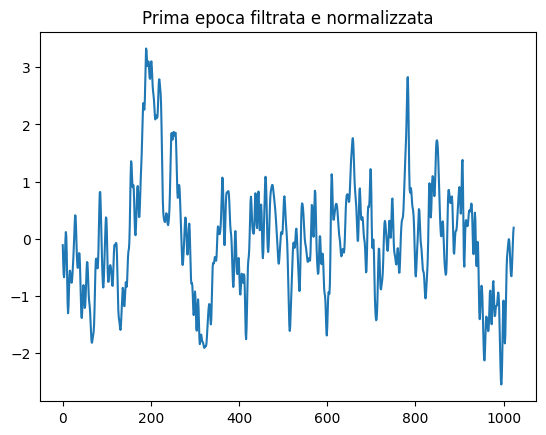

Epoche ottenute: (55, 1024)


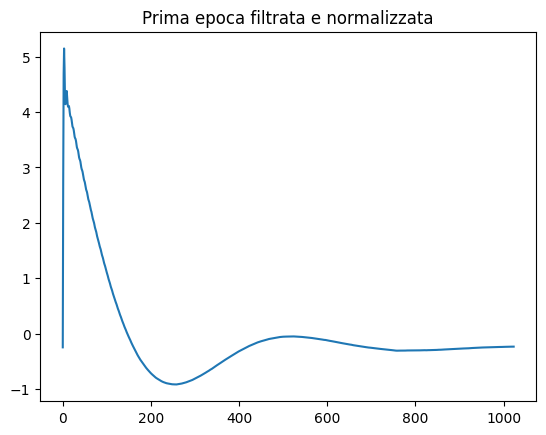

Epoche ottenute: (47, 1024)


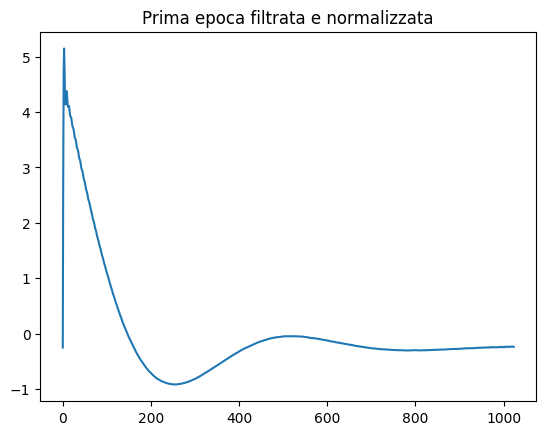

In [3]:
# --- MOUNT DRIVE E IMPORT ---
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, iirnotch, resample_poly
from sklearn.model_selection import GroupKFold, GroupShuffleSplit

# Percorso base dei dati
data_dir = "/content/drive/My Drive/LL2/LL2/raw_data"

# --- PARAMETRI ---
FS_OUT = 256
BP_LO, BP_HI = 0.5, 45
NOTCH_F0, NOTCH_Q = 50, 30
EPOCH_SEC, STRIDE_SEC = 4.0, 2.0
N_FOLDS, RNG_SEED = 5, 42


# --- LETTURA FILE ---
def load_eeg_data(task, level, channel_id=None, subject_id=None):
    """
    Carica il dataset EEG per un compito e livello specifico.
    Se channel_id è None, restituisce i dati di tutti i canali.
    Se channel_id è un numero, restituisce solo i dati di quel canale.
    """
    file_path = os.path.join(data_dir, f"{task}_Data", f"{level}-{subject_id}.txt")
    if not os.path.exists(file_path):
        print(f"File non trovato: {file_path}")
        return None

    df = pd.read_csv(file_path, sep=",", header=None, engine="python")

    # La colonna 23 (indice 22) è il tempo
    df["Time"] = pd.to_numeric(df.iloc[:, 22], errors="coerce")
    df["Time"] = df["Time"] - df["Time"].iloc[1]

    if channel_id is not None:
        df = pd.DataFrame({
            "EEG Signal": df.iloc[:, channel_id],
            "Time": df["Time"]
        })
    return df


# --- FILTRI ---
def bandpass(x, fs, lo=BP_LO, hi=BP_HI, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lo/nyq, hi/nyq], btype="band")
    return filtfilt(b, a, x, axis=0)

def notch50(x, fs, f0=NOTCH_F0, Q=NOTCH_Q):
    b, a = iirnotch(w0=f0/(fs/2), Q=Q)
    return filtfilt(b, a, x, axis=0)

def resample_to(x, fs_in, fs_out):
    if fs_in == fs_out:
        return x
    from math import gcd
    g = gcd(int(fs_in), int(fs_out))
    up, down = fs_out//g, fs_in//g
    return resample_poly(x, up=up, down=down, axis=0)


# --- NORMALIZZAZIONE E EPOCHING ---
def zscore_epochwise(x):
    m = x.mean(axis=0, keepdims=True)
    s = x.std(axis=0, keepdims=True) + 1e-8
    return (x - m) / s

def epoch_signal(x, fs, epoch_sec=EPOCH_SEC, stride_sec=STRIDE_SEC):
    win = int(epoch_sec * fs)
    step = int(stride_sec * fs)
    n = len(x)
    starts = np.arange(0, n - win + 1, step)
    epochs = np.stack([x[s:s+win] for s in starts])
    return epochs, starts


# --- PREPROCESS COMPLETO DI UN CANALE ---
def preprocess_single_channel(df, fs_in=250):
    x = df["EEG Signal"].values
    x = bandpass(x, fs_in)
    x = notch50(x, fs_in)
    x = resample_to(x, fs_in, FS_OUT)
    epochs, _ = epoch_signal(x, FS_OUT)
    epochs = np.stack([zscore_epochwise(e) for e in epochs])
    return epochs


# --- ESEMPIO USO ---
task = "Stroop"
level = "highlevel"
subject = 3
channel = 3

df = load_eeg_data(task, level, channel, subject)
epochs = preprocess_single_channel(df, fs_in=250)

print("Epoche ottenute:", epochs.shape)  # (N, 1024)
plt.plot(epochs[0])
plt.title("Prima epoca filtrata e normalizzata")
plt.show()

task = "Stroop"
level = "highlevel"
subject = 1
channel = 3

df = load_eeg_data(task, level, channel, subject)
epochs = preprocess_single_channel(df, fs_in=250)

print("Epoche ottenute:", epochs.shape)  # (N, 1024)
plt.plot(epochs[0])
plt.title("Prima epoca filtrata e normalizzata")
plt.show()

task = "Stroop"
level = "highlevel"
subject = 7
channel = 3

df = load_eeg_data(task, level, channel, subject)
epochs = preprocess_single_channel(df, fs_in=250)

print("Epoche ottenute:", epochs.shape)  # (N, 1024)
plt.plot(epochs[0])
plt.title("Prima epoca filtrata e normalizzata")
plt.show()




#### non ho capito perchè viene così il segnale potrebbe essere dovuto a rumori, drift, o line noise


provare
from scipy.signal import detrend

def common_average_reference(x):          # x: (C, T)
    return x - x.mean(axis=0, keepdims=True)

def robust_clip(x, q=0.999):              # taglia outlier pesanti
    hi = np.quantile(x, q, axis=-1, keepdims=True)
    lo = np.quantile(x, 1-q, axis=-1, keepdims=True)
    return np.clip(x, lo, hi)

def preprocess_recording(X_ct):
    x = bandpass(X_ct, fs_in)             # 0.5–45
    x = notch50(x, fs_in)                  # 50 Hz
    x = detrend(x, axis=-1, type='linear') # rimuove drift lento
    x = common_average_reference(x)        # CAR
    x = robust_clip(x, q=0.999)            # limita picchi assurdi
    x = resample_to(x, fs_in, FS_OUT)      # 250→256
    epochs, _ = epoch_signal(x, FS_OUT)    # (N, C, 1024)
    if len(epochs)==0: return epochs
    # z-score robusto per epoca (mediana/MAD, meno sensibile agli outlier)
    med = np.median(epochs, axis=-1, keepdims=True)
    mad = np.median(np.abs(epochs-med), axis=-1, keepdims=True) + 1e-8
    epochs = (epochs - med)/(1.4826*mad)
    return epochs



#### controlla se  C canali li prende da colonna 2 e non 1

build_all(...)
- cicla su tutti i (level, task, subject):
Carica, pre-processa, fa epoching.
- Appende le epoche a X_all (shape finale: (N_tot, 15, 1024)).
- Costruisce i vettori di:
y_all (etichette 0/1/2 in base al level),
meta (subject, task, level) per tenere traccia di chi è chi.

In [2]:
# ====== SETUP MINIMO (COLAB-FRIENDLY) ======
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, json
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt, iirnotch, resample_poly
from sklearn.model_selection import GroupKFold, GroupShuffleSplit

# ---- PARAMETRI DA CAMBIARE SE SERVE ----
data_dir = "/content/drive/My Drive/LL2/LL2/raw_data"

# ATTENZIONE ai nomi: qui fissiamo chiaramente cosa è cosa:
levels = ["highlevel", "midlevel", "lowlevel"]      # livelli (questi saranno le y = 0,1,2)
tasks  = ["Stroop", "Arithmetic"]                   # task (cartelle o nomi file)
subjects = range(1, 16)
C = 15          # numero canali EEG (prime C colonne del file)
fs_in = 250     # frequenza originale
FS_OUT = 256    # target
EPOCH_SEC, STRIDE_SEC = 4.0, 2.0
BP_LO, BP_HI = 0.5, 45.0
NOTCH_F0, NOTCH_Q = 50.0, 30.0
N_FOLDS, RNG_SEED = 5, 42

# ---- TROVA IL FILE (supporta entrambe le strutture) ----
def find_file(level, task, subject):
    # Caso A (quello che usavi in un punto):  {level}_Data / {task}-{subject}.txt
    p1 = os.path.join(data_dir, f"{level}_Data", f"{task}-{subject}.txt")
    # Caso B (l’altro che avevamo usato):     {task}_Data / {level}-{subject}.txt
    p2 = os.path.join(data_dir, f"{task}_Data",  f"{level}-{subject}.txt")
    if os.path.exists(p1): return p1
    if os.path.exists(p2): return p2
    return None

# ---- CARICA MATRICE EEG (C,T) dalle prime C colonne ----
def load_ct_matrix(path, C):
    df = pd.read_csv(path, sep=",", header=None, engine="python")
    if df.shape[1] < C:
        raise ValueError(f"{path}: attese >= {C} colonne EEG, trovate {df.shape[1]}")
    X = df.iloc[:, :C].to_numpy(dtype=float).T  # (C,T)
    return X

# ---- PREPROCESS COMPLETO DI UNA REGISTRAZIONE ----
def preprocess_recording(X_ct):
    x = bandpass(X_ct, fs_in)
    x = notch50(x, fs_in)
    x = resample_to(x, fs_in, FS_OUT)
    epochs, _ = epoch_signal(x, FS_OUT)
    if len(epochs)==0:
        return epochs
    epochs = zscore_epochwise(epochs)
    return epochs  # (N, C, 1024)

# ---- BUILD: crea X_all, y_all, meta ----
def build_all(levels, tasks, subjects, C):
    X_all, y_all, subj_all, task_all, level_all = [], [], [], [], []
    for li, level in enumerate(levels):           # li = etichetta (0,1,2)
        for task in tasks:
            for s in subjects:
                path = find_file(level, task, s)
                if path is None:
                    print(f"[SKIP] non trovato: {level}/{task} S{s}")
                    continue
                X_ct = load_ct_matrix(path, C)
                epochs = preprocess_recording(X_ct)
                if epochs.shape[0]==0:
                    print(f"[SKIP] troppe poche samples: {os.path.basename(path)}")
                    continue
                X_all.append(epochs)
                y_all.extend([li]*len(epochs))          # y = livello
                subj_all.extend([f"S{s}"]*len(epochs))  # gruppi per split
                task_all.extend([task]*len(epochs))
                level_all.extend([level]*len(epochs))
    X_all = np.concatenate(X_all, axis=0) if X_all else np.empty((0, C, int(EPOCH_SEC*FS_OUT)))
    y_all = np.array(y_all, dtype=int)
    meta = {"subject": np.array(subj_all), "task": np.array(task_all), "level": np.array(level_all)}
    return X_all, y_all, meta



Mounted at /content/drive
X_all: (3697, 15, 1024) | y_all: (3697,)
Fold 0: N(tr)=2177, N(val)=763, N(te)=757 | S(tr)=9, S(val)=3, S(te)=3
Fold 1: N(tr)=2301, N(val)=652, N(te)=744 | S(tr)=9, S(val)=3, S(te)=3
Fold 2: N(tr)=2240, N(val)=727, N(te)=730 | S(tr)=9, S(val)=3, S(te)=3
Fold 3: N(tr)=2172, N(val)=796, N(te)=729 | S(tr)=9, S(val)=3, S(te)=3
Fold 4: N(tr)=2164, N(val)=796, N(te)=737 | S(tr)=9, S(val)=3, S(te)=3


 Split in 5 fold **subject-independent** make_subject_folds usa:

* **GroupKFold(5)** per garantire che i **soggetti** dei set *train/val/test* non si mescolino.
* Dentro ogni fold, il train viene ancora diviso in *train/val* con **GroupShuffleSplit** (20% val), sempre raggruppando per soggetto.
* Risultato: per ciascun fold ottieni indici per **train**, **val**, **test** *senza leakage tra soggetti*.

La stampa tipo:

Fold 0: N(tr)=2177, N(val)=763, N(te)=757 | S(tr)=9, S(val)=3, S(te)=3

significa che in quel fold hai 9 soggetti in train, 3 in val, 3 in test.



In [ ]:
# ---- SPLIT 5-FOLD SUBJECT-INDEPENDENT ----
def make_subject_folds(subj_vec, n_splits=N_FOLDS, seed=RNG_SEED):
    groups = subj_vec
    gkf = GroupKFold(n_splits=n_splits)
    folds = []
    for (trainval_idx, test_idx) in (split for _, split in enumerate(gkf.split(np.zeros_like(groups), groups=groups))):
        gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
        tr_rel, va_rel = next(gss.split(trainval_idx, groups=groups[trainval_idx]))
        tr, va = trainval_idx[tr_rel], trainval_idx[va_rel]
        folds.append({"train": tr, "val": va, "test": test_idx})
    return folds

# ===== ESEGUI =====
X_all, y_all, meta = build_all(levels, tasks, subjects, C)
print("X_all:", X_all.shape, "| y_all:", y_all.shape)

folds = make_subject_folds(meta["subject"])
for k, split in enumerate(folds):
    trS = set(meta["subject"][split["train"]]); vaS = set(meta["subject"][split["val"]]); teS = set(meta["subject"][split["test"]])
    assert trS.isdisjoint(vaS) and trS.isdisjoint(teS) and vaS.isdisjoint(teS)
    print(f"Fold {k}: N(tr)={len(split['train'])}, N(val)={len(split['val'])}, N(te)={len(split['test'])} | "
          f"S(tr)={len(trS)}, S(val)={len(vaS)}, S(te)={len(teS)}")


#  Patching (da (N, C, 1024) a (N, C, S, P))

Nel blocco “CONFIG RAPIDA” scegli:

```python
S, P = 4, 200   # (nel tuo snippet)
# oppure 4, 256  # nel run precedente che hai incollato sopra
```

La funzione `to_patches` **taglia o pad** il time-length per farlo diventare esattamente `S*P`, poi fa `reshape` a **(N, C, S, P)**.

⚠️ Nota importante:

* Con `FS_OUT=256` e **epoche da 4 s** hai **T=1024**.
* Se scegli **S=4, P=256**, allora **S*P=1024** e **non perdi nulla** → perfetto.
* Se scegli **S=4, P=200**, allora **S*P=800**: il codice **taglia** i primi 800 campioni, scartando 224 campioni (≈0.875 s). Questo può andare in crash o degradare le prestazioni se il modello **CBraMod** si aspetta una lunghezza temporale specifica (spesso 256).
  In effetti, nel log che hai incollato sopra si vede un `RuntimeError` dentro `cbramod.py` quando la shape non combacia con quanto si aspetta la rete. Quindi: **usa S=4, P=256** per stare serena.

# DataLoader

Crea tre DataLoader PyTorch per **train/val/test** con batch da 64, pescando tensori:

* **X**: `(N, 15, S, P)` float32
* **y**: etichette long

# Modello: CBraMod come feature extractor

```python
model = CBraMod().to(device)
model.proj_out = nn.Identity()
model.eval()
```

* Istanzia **CBraMod** (la tua architettura backbone).
* Sostituisce l’ultimo “proiettore” (`proj_out`) con una **Identity**: così l’output del forward è **il tensore di feature “grezze”** invece di logits/classi.
* Se `TARGET_PTH` punta a un checkpoint, li carica (altrimenti random init).

# Estrazione feature con pooling

`extract_features`:

* Passa i batch nel backbone: `feats = backbone(xb)`. Con `proj_out = Identity`, il codice **si aspetta** un’uscita shape **(B, C, S, P)**.
* Applica un pooling:

  * `"mean_time"`: fa la media su dimensioni (S,P) → ottieni **(B, C)** (cioè 15 feature, una per canale, se C=15).
  * `"flatten"`: fa un flatten completo → **(B, C*S*P)** (più grande).
* Torna `X_feat` e `y` per train/val/test.

> Con `mean_time` e **C=15**, le feature sono **15D**: semplici ma spesso efficaci con un classificatore lineare.

# Classificatore LDA e metriche

Costruisce una pipeline **StandardScaler + LDA**:

```python
LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
```

* Allena su `X_tr_feat, y_tr_feat`.
* Predice su val/test e stampa:

  * Accuracy su val/test
  * Matrice di confusione
  * Classification report (precision/recall/F1 per classe)

In [17]:
# ======== CONFIG RAPIDA ========
FOLD = 0                 # scegli 0..4
S, P = 4, 200            # patching 4x200 (1024 campioni = 4 s @ 200 Hz)
BATCH = 64
NUM_WORKERS = 0          # Colab/CPU: lascia 0 per evitare errori multiprocess
PIN_MEMORY = False       # su CPU: False
POOLING = "mean_time"    # "mean_time" oppure "flatten"
TARGET_PTH = globals().get("target_pth", None)  # opzionale: path ai pesi .pth (se definito sopra)

# Salvataggio su Drive (opzionale)
SAVE_TO_DRIVE = False
DRIVE_DIR = "/content/drive/My Drive/LL2/LL2/exports_cbramod"  # cambia se vuoi

# ======== CHECK DI BASE ========
import numpy as np, torch, json, os
from pathlib import Path
from torch.utils.data import TensorDataset, DataLoader

for v in ["X_all", "y_all", "folds"]:
    if v not in globals():
        raise RuntimeError(f"Variabile mancante: {v}. Devi prima eseguire la cella di preprocessing che la crea.")

X_all = np.asarray(X_all)   # (N, C, 1024)
y_all = np.asarray(y_all)

# ======== PATCHING (N, C, 1024) -> (N, C, S, P) ========
def to_patches(X, S=4, P=256):
    N, C, T = X.shape
    need = S*P
    if T == need:
        Xp = X
    elif T > need:
        Xp = X[:, :, :need]
    else:
        pad = need - T
        Xp = np.pad(X, ((0,0),(0,0),(0,pad)), mode="constant")
    return Xp.reshape(N, C, S, P)

idx_tr = folds[FOLD]["train"]; idx_va = folds[FOLD]["val"]; idx_te = folds[FOLD]["test"]
X_tr, y_tr = X_all[idx_tr], y_all[idx_tr]
X_va, y_va = X_all[idx_va], y_all[idx_va]
X_te, y_te = X_all[idx_te], y_all[idx_te]

X_tr_p = to_patches(X_tr, S, P)
X_va_p = to_patches(X_va, S, P)
X_te_p = to_patches(X_te, S, P)
print("Shapes (patches):", X_tr_p.shape, X_va_p.shape, X_te_p.shape)

# ======== DATALOADER ========
train_loader = DataLoader(TensorDataset(torch.tensor(X_tr_p, dtype=torch.float32),
                                        torch.tensor(y_tr,   dtype=torch.long)),
                          batch_size=BATCH, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)
val_loader   = DataLoader(TensorDataset(torch.tensor(X_va_p, dtype=torch.float32),
                                        torch.tensor(y_va,   dtype=torch.long)),
                          batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)
test_loader  = DataLoader(TensorDataset(torch.tensor(X_te_p, dtype=torch.float32),
                                        torch.tensor(y_te,   dtype=torch.long)),
                          batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)

# ======== MODELLO: CBraMod + proj_out=Identity ========
import torch.nn as nn
from models.cbramod import CBraMod

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CBraMod().to(device)
if TARGET_PTH and Path(TARGET_PTH).exists():
    state = torch.load(TARGET_PTH, map_location=device)
    missing, unexpected = model.load_state_dict(state, strict=False)
    print(f"Pretrained loaded. Missing={len(missing)} Unexpected={len(unexpected)}")
else:
    print("No pretrained checkpoint (TARGET_PTH) — using random init.")

model.proj_out = nn.Identity()
model.eval()

# ======== FEATURE EXTRACTION ========
from tqdm.auto import tqdm

def extract_features(backbone, loader, pooling="mean_time", device="cpu"):
    Xs, ys = [], []
    backbone.eval()
    with torch.no_grad():
        for xb, yb in tqdm(loader, desc="Extract"):
            xb = xb.to(device)
            feats = backbone(xb)  # (B, C, S, P) perché proj_out = Identity
            if pooling == "mean_time":
                feats = feats.mean(dim=(2,3))        # (B, C)
            elif pooling == "flatten":
                feats = feats.reshape(feats.size(0), -1)  # (B, C*S*P)
            else:
                raise ValueError("pooling must be 'mean_time' or 'flatten'")
            Xs.append(feats.cpu().numpy()); ys.append(yb.numpy())
    return np.concatenate(Xs, 0), np.concatenate(ys, 0)

X_tr_feat, y_tr_feat = extract_features(model, train_loader, pooling=POOLING, device=device)
X_va_feat, y_va_feat = extract_features(model, val_loader,   pooling=POOLING, device=device)
X_te_feat, y_te_feat = extract_features(model, test_loader,  pooling=POOLING, device=device)

print("Feature shapes:", X_tr_feat.shape, X_va_feat.shape, X_te_feat.shape)

# ======== LDA ========
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lda_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")),
])
lda_pipe.fit(X_tr_feat, y_tr_feat)
va_pred = lda_pipe.predict(X_va_feat)
te_pred = lda_pipe.predict(X_te_feat)

val_acc = accuracy_score(y_va_feat, va_pred)
test_acc = accuracy_score(y_te_feat, te_pred)
cm = confusion_matrix(y_te_feat, te_pred)

print(f"[LDA] Val ACC:  {val_acc:.3f}")
print(f"[LDA] Test ACC: {test_acc:.3f}")
print("Confusion Matrix (test):\n", cm)
print("Report (test):\n", classification_report(y_te_feat, te_pred, digits=3))

# ======== (OPZIONALE) SALVATAGGIO SU DRIVE ========
if SAVE_TO_DRIVE:
    out_dir = Path(DRIVE_DIR)
    out_dir.mkdir(parents=True, exist_ok=True)
    # salviamo features e predizioni
    np.savez_compressed(out_dir / f"features_fold{FOLD}.npz",
                        X_tr=X_tr_feat, y_tr=y_tr_feat,
                        X_va=X_va_feat, y_va=y_va_feat,
                        X_te=X_te_feat, y_te=y_te_feat,
                        pooling=POOLING, S=S, P=P)
    report = {
        "fold": int(FOLD),
        "pooling": POOLING,
        "val_acc": float(val_acc),
        "test_acc": float(test_acc),
        "confusion_matrix": cm.tolist(),
    }
    with open(out_dir / f"report_fold{FOLD}.json", "w") as f:
        json.dump(report, f, indent=2)
    print(f"✅ Salvato in: {out_dir.resolve()}")
else:
    print("ℹ️ Non salvo su Drive (SAVE_TO_DRIVE=False).")


Shapes (patches): (2177, 15, 4, 200) (763, 15, 4, 200) (757, 15, 4, 200)
Pretrained loaded. Missing=0 Unexpected=0


Extract:   0%|          | 0/35 [00:00<?, ?it/s]

Extract:   0%|          | 0/12 [00:00<?, ?it/s]

Extract:   0%|          | 0/12 [00:00<?, ?it/s]

Feature shapes: (2177, 15) (763, 15) (757, 15)
[LDA] Val ACC:  0.400
[LDA] Test ACC: 0.404
Confusion Matrix (test):
 [[297   7  13]
 [209   3  11]
 [209   2   6]]
Report (test):
               precision    recall  f1-score   support

           0      0.415     0.937     0.576       317
           1      0.250     0.013     0.026       223
           2      0.200     0.028     0.049       217

    accuracy                          0.404       757
   macro avg      0.288     0.326     0.217       757
weighted avg      0.305     0.404     0.262       757

ℹ️ Non salvo su Drive (SAVE_TO_DRIVE=False).


In [12]:
# 1) scegli il fold
k = 0  # 0..4
idx_tr = folds[k]["train"]
idx_va = folds[k]["val"]
idx_te = folds[k]["test"]

# 2) crea gli split (già epocizzati: (N, C, 1024))
X_train, y_train = X_all[idx_tr], y_all[idx_tr]
X_val,   y_val   = X_all[idx_va], y_all[idx_va]
X_test,  y_test  = X_all[idx_te], y_all[idx_te]

print(X_train.shape, X_val.shape, X_test.shape)  # -> (N,C,1024)

# 3) DataLoader PyTorch
import torch
from torch.utils.data import TensorDataset, DataLoader

# Se il tuo modello vuole input (N, 1, C, T) aggiungi una dimensione canale:
# X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_val_t   = torch.tensor(X_val,   dtype=torch.float32)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val,   dtype=torch.long)
y_test_t  = torch.tensor(y_test,  dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t),
                          batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(TensorDataset(X_val_t,   y_val_t),
                          batch_size=64, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(TensorDataset(X_test_t,  y_test_t),
                          batch_size=64, shuffle=False, num_workers=2, pin_memory=True)


(2177, 15, 1024) (763, 15, 1024) (757, 15, 1024)


In [14]:
# 1) funzione per convertire (N, C, 1024) -> (N, C, S, P)
def to_patches(X, S=4, P=256, mode="trim"):
    # X: (N, C, T) con T=1024 atteso
    N, C, T = X.shape
    need = S*P
    if T == need:
        Xp = X
    elif T > need:
        # taglia i campioni in eccesso (dall'inizio)
        Xp = X[:, :, :need]
    else:
        # pad con zeri fino a need
        pad = need - T
        Xp = np.pad(X, ((0,0),(0,0),(0,pad)), mode="constant")
    # reshape in (N, C, S, P)
    Xp = Xp.reshape(N, C, S, P)
    return Xp

# 2) scegli S e P in linea con il modello (qui tipico 4x256)
S, P = 4, 256

# 3) applica la conversione agli split
X_train_p = to_patches(X_train, S=S, P=P)
X_val_p   = to_patches(X_val,   S=S, P=P)
X_test_p  = to_patches(X_test,  S=S, P=P)

print("Shapes patches:",
      X_train_p.shape, X_val_p.shape, X_test_p.shape)  # -> (N, C, S, P)

# 4) DataLoader senza pin_memory su CPU
import torch
from torch.utils.data import TensorDataset, DataLoader

train_loader = DataLoader(
    TensorDataset(torch.tensor(X_train_p, dtype=torch.float32),
                  torch.tensor(y_train,   dtype=torch.long)),
    batch_size=64, shuffle=True, num_workers=2, pin_memory=False
)
val_loader = DataLoader(
    TensorDataset(torch.tensor(X_val_p, dtype=torch.float32),
                  torch.tensor(y_val,   dtype=torch.long)),
    batch_size=64, shuffle=False, num_workers=2, pin_memory=False
)
test_loader = DataLoader(
    TensorDataset(torch.tensor(X_test_p, dtype=torch.float32),
                  torch.tensor(y_test,   dtype=torch.long)),
    batch_size=64, shuffle=False, num_workers=2, pin_memory=False
)

# 5) quick sanity check: forma del primo batch
xb, yb = next(iter(train_loader))
print("Batch shape:", xb.shape)  # atteso: (B, C, S, P)


Shapes patches: (2177, 15, 4, 256) (763, 15, 4, 256) (757, 15, 4, 256)
Batch shape: torch.Size([64, 15, 4, 256])


In [13]:
import torch.nn as nn

model.proj_out = nn.Identity()
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

X_tr, y_tr = extract_features(model, train_loader, pooling="mean_time", device=device)
X_va, y_va = extract_features(model, val_loader,   pooling="mean_time", device=device)
X_te, y_te = extract_features(model, test_loader,  pooling="mean_time", device=device)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

lda_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")),
])
lda_pipe.fit(X_tr, y_tr)
va_pred = lda_pipe.predict(X_va)
te_pred = lda_pipe.predict(X_te)
print("[LDA] Val ACC:", accuracy_score(y_va, va_pred))
print("[LDA] Test ACC:", accuracy_score(y_te, te_pred))
print("Confusion Matrix (LDA):\n", confusion_matrix(y_te, te_pred))


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Extract:   0%|          | 0/35 [00:00<?, ?it/s]

ValueError: not enough values to unpack (expected 4, got 3)